In [3]:
from torchvision import models

model = models.resnet18(pretrained=True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [74]:
import torch
import torch.nn as nn

def get_model_conv_layers(model):
    conv_layers = []
    for layer in model.children():
        if isinstance(layer, torch.nn.modules.conv.Conv2d):
            conv_layers.append(layer)
        elif list(layer.children()) != []:
            print(type(layer))
            conv_layers += get_model_conv_layers(layer)
    return conv_layers

# 函数传入模型model，函数返回这个模型中的卷积层对象


def get_model_conv_layers1(model):
    convs = list()  # 设置convs列表，保存卷积层对象
    # 设置layers，保存传入的model模型中的每个子层
    layers = list(model.children())
    for layer in layers:  # 循环遍历layers
        # 如果遍历的layer是Conv2d类型
        if type(layer) == nn.Conv2d:
            convs.append(layer)  # 将它保存到convs列表中
        # 如果遍历的layer是Sequential类型
        elif type(layer) == nn.Sequential:
            # 那么还需要继续遍历layer的下一层
            for sub in layer:
                for child in sub.children():
                    # 将sub中的Conv2d卷积层找到
                    if type(child) == nn.Conv2d:
                        # 同样保存到convs列表中
                        convs.append(child)
                    # else:
                    #     if list(child.children()) != []:
                    #         print(list(child.children()))
    return convs  # 函数返回convs列表


def get_feature_maps(conv_layers, img):
    feature_maps = []
    img = img.unsqueeze(0)
    for layer in conv_layers:
        img = layer(img)
        feature_maps.append(img)
    
    outputs = []
    for i, feature_map in enumerate( feature_maps):
        # print(f'i = {i}')
        # print('before squeeze:', feature_map.shape)
        output = feature_map.squeeze(0)
        # print('after squeeze:', output.shape)
        output = output.mean(dim=0).data.numpy()
        # print('after mean:', output.shape)
        outputs.append(output)
        # print('-------------------')
    return outputs

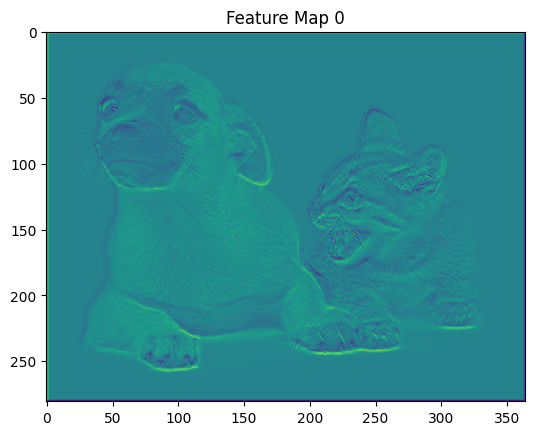

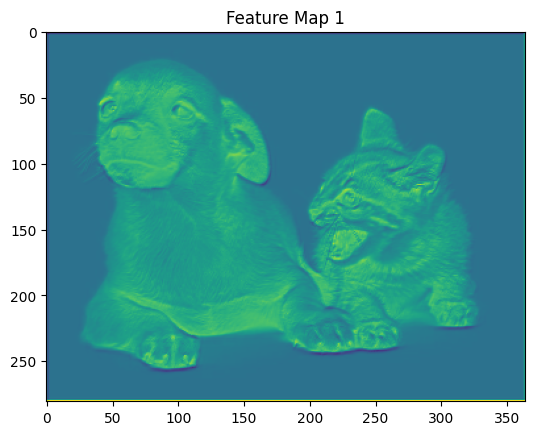

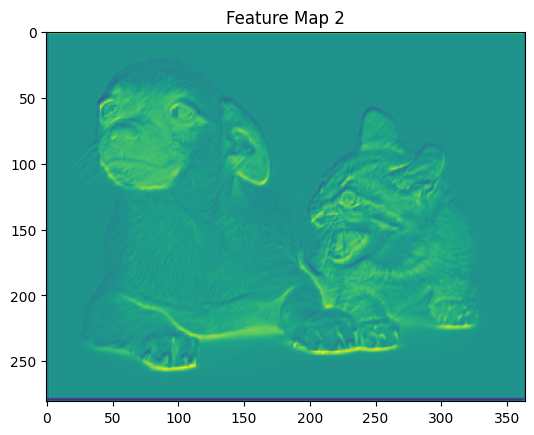

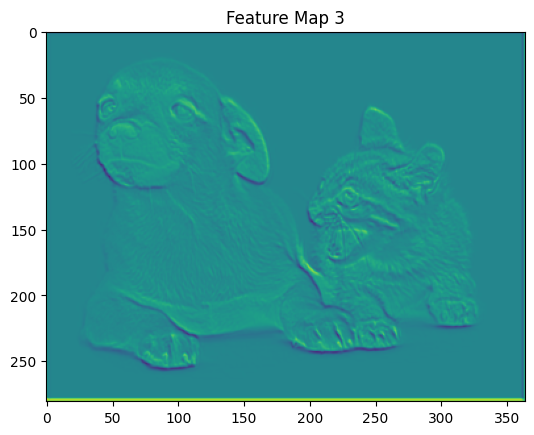

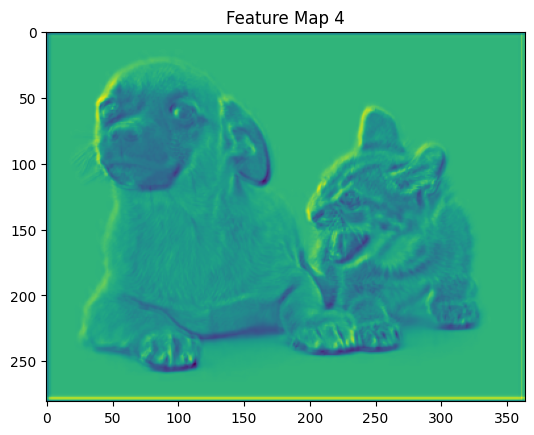

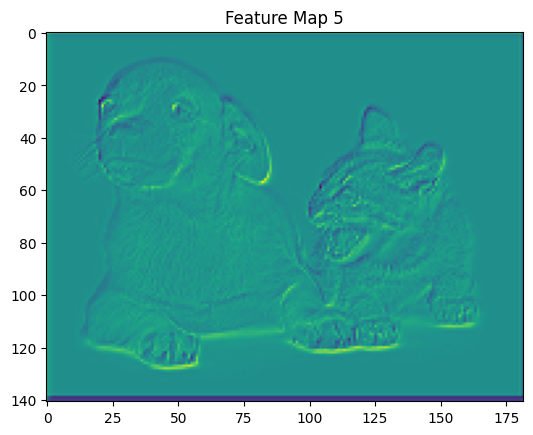

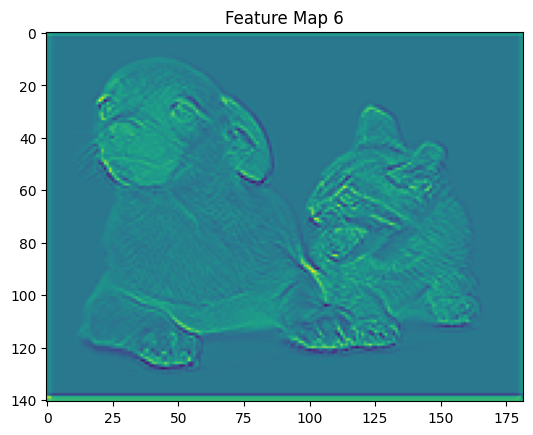

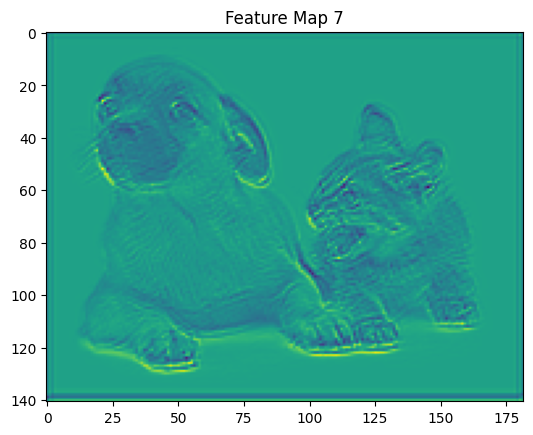

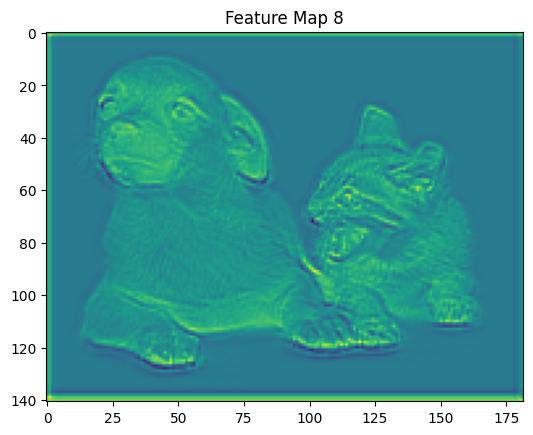

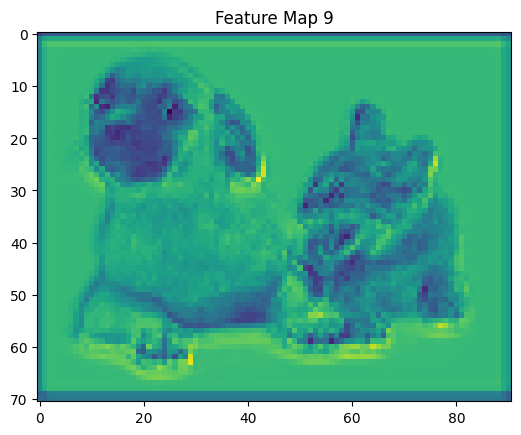

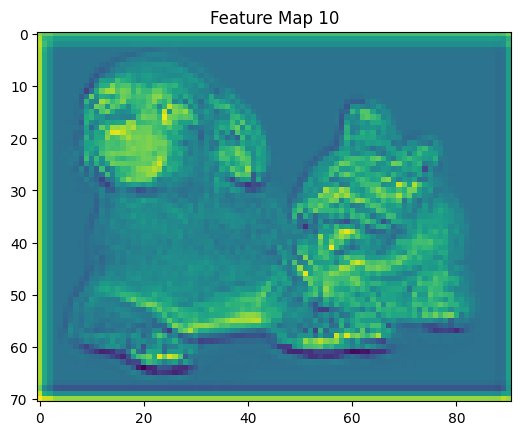

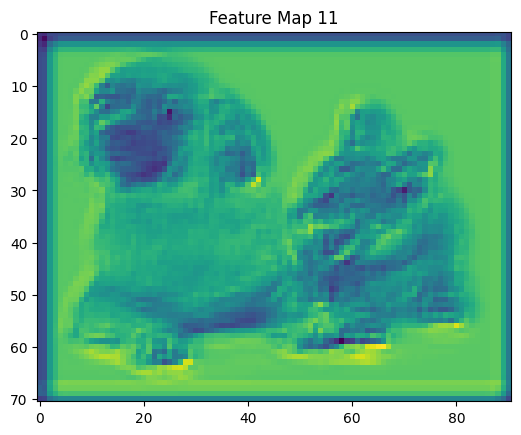

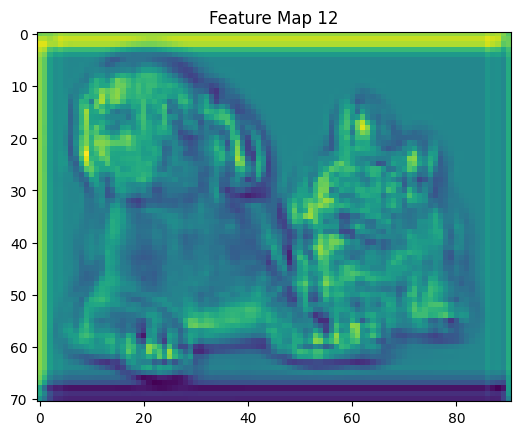

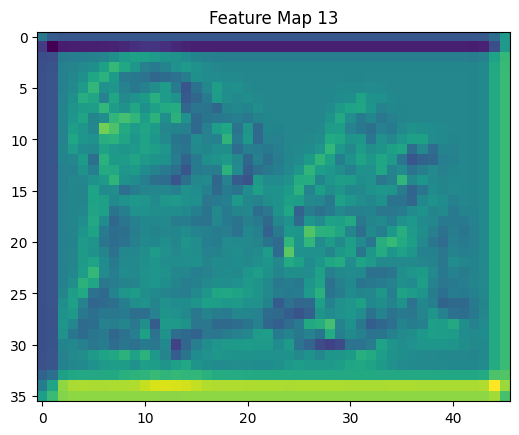

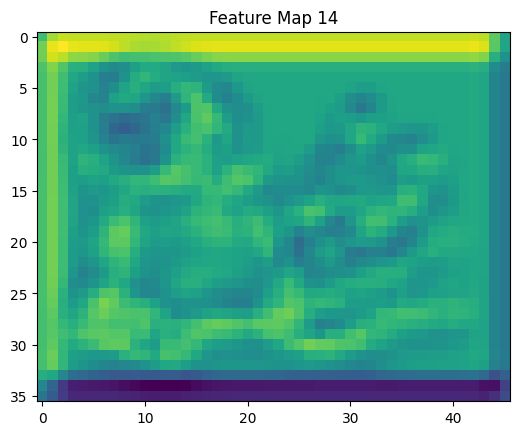

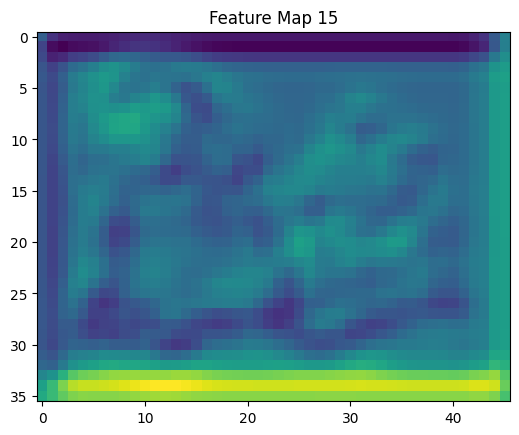

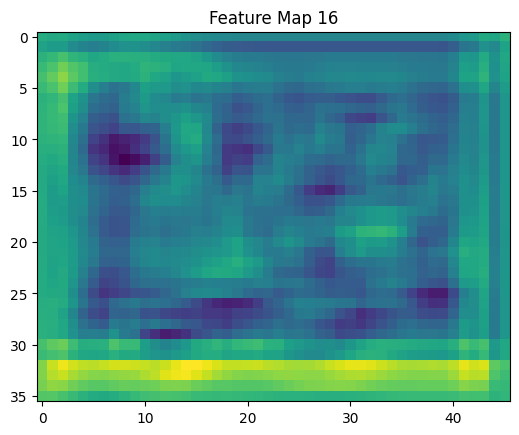

In [84]:
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

conv_layers = get_model_conv_layers1(model)
img = Image.open('./catdog.jpg')
transforms = transforms.Compose([
    transforms.ToTensor(),
])
img_transformed = transforms(img)
feature_maps = get_feature_maps(conv_layers, img_transformed)

for i, img in enumerate(feature_maps):
    plt.imshow(img)
    plt.title(f'Feature Map {i}')
    plt.show()